# Lab | Comparing regression models

In [665]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [666]:
customer_df = pd.read_csv('./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

#### From Lab 4.1 - Deal with column names

In [667]:
col = list(customer_df.columns)

def PE8 (x):
       return x.lower().replace(' ', '_')

col_new = list(map(PE8, col))
customer_df.columns = col_new

#### From Lab 4.2: Check number of unique values in each column, can they be combined in any way to ease encoding? 

##### 1) Education

In [668]:
customer_df['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [669]:
customer_df['education'] = np.where(customer_df['education'].isin(['Master', 'Doctor']), 'Higher Eduction', customer_df['education'])

##### 2. EmploymentStatus

In [670]:
customer_df['employmentstatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [671]:
customer_df['employmentstatus'] = np.where(customer_df['employmentstatus'].isin(['Medical Leave', 'Disabled', 'Retired']), 'Other', customer_df['employmentstatus'])
customer_df['employmentstatus'].value_counts()

Employed      5698
Unemployed    2317
Other         1119
Name: employmentstatus, dtype: int64

##### 3. Policy

In [672]:
customer_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [673]:
special = ['Special L1', 'Special L2', 'Special L3']
corp = ['Corporate L2', 'Corporate L1', 'Corporate L3']

def policy_clust(x):
            if x in special: 
                return 'Speial'
            elif x in corp: 
                return 'Corporate'
            else: 
                return x
        
customer_df['policy'] = customer_df['policy'].apply(policy_clust)
customer_df['policy'].value_counts()

Personal L3    3426
Personal L2    2122
Corporate      1968
Personal L1    1240
Speial          378
Name: policy, dtype: int64

##### 4. Vehicle Class

In [674]:
customer_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [675]:
customer_df['vehicle_class'] = np.where(customer_df['vehicle_class'].isin(['Sports Car', 'Luxury SUV', 'Luxury Car']), 'Others', customer_df['vehicle_class'])
customer_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Others            831
Name: vehicle_class, dtype: int64

In [676]:
customer_df = pd.DataFrame(customer_df)

# Lab | Comparing regression models

In [677]:
from sklearn.model_selection import train_test_split

#### 2. Remove Outliers from numeric features

In [678]:
# CHECKING FOR OUTLIERS with Boxplot

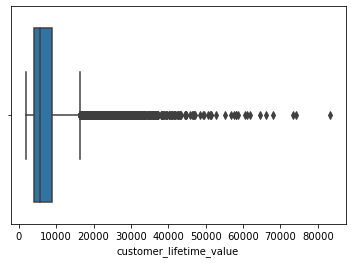

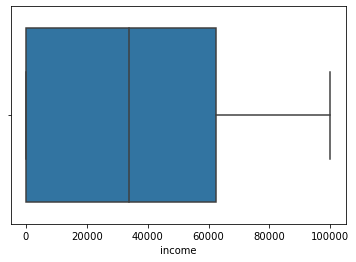

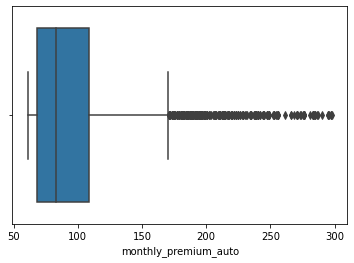

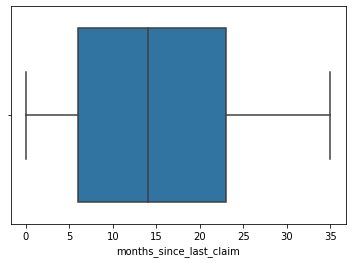

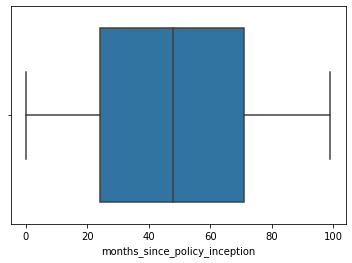

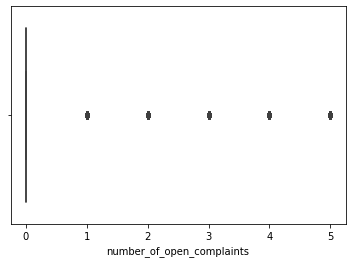

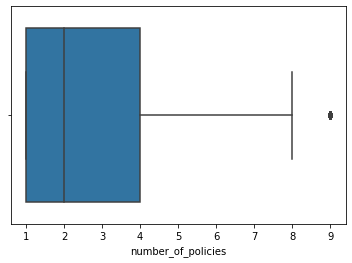

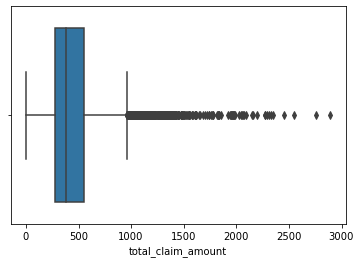

In [679]:
customer_num = customer_df.select_dtypes(include = np.number)

for i in customer_num:    
    sns.boxplot(x = customer_num[i])
    plt.show()
    
#There are some outliers in CUSTOMER LIFETIME VALUE, CLAIM AMOUNT and NUMBER OF POLICIES. 

# --> Remove outliers with the IQR Method: 


In [680]:
# IQR METHODE FOR OUTLIERS 

def upper_limit(x):
    #IQR
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    #Upper_limit
    upper_limit = Q3 + 1.5*IQR
    return upper_limit

customer_df_outlier_dropped = customer_df.loc[(customer_df['total_claim_amount'] <= upper_limit(customer_df['total_claim_amount'])) &
               (customer_df['number_of_policies'] <= upper_limit(customer_df['number_of_policies'])) &
               (customer_df['monthly_premium_auto'] <= upper_limit(customer_df['monthly_premium_auto'])) &
               (customer_df['customer_lifetime_value'] <= upper_limit(customer_df['customer_lifetime_value']))]

print('This is the shape after removing the outliers {}'.format(customer_df_outlier_dropped.shape))
print('This is the shape before removing the outliers {}'.format(customer_df.shape))


This is the shape after removing the outliers (7454, 24)
This is the shape before removing the outliers (9134, 24)


In [681]:
#Checking if there are any Null Values 

customer_df_outlier_dropped.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

#### 3. TRAIN TEST SPLIT

In [683]:
y_df = customer_df_outlier_dropped[['total_claim_amount']] # I chose Total Claim Amount as prediction value
X_df = customer_df_outlier_dropped.drop(['total_claim_amount'], axis = 1)

In [684]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.3, random_state = 22)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

X_train_cat = X_train.select_dtypes('object')
X_test_cat = X_test.select_dtypes('object')
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num = X_test.select_dtypes(include = np.number)

#### 4. Normalize the continuous variables

In [688]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled_num = scaler.fit_transform(X_train_num)
X_test_scaled_num = scaler.fit_transform(X_test_num)

X_train_scaled_num = pd.DataFrame(X_train_scaled_num, columns = X_train_num.columns)
X_test_scaled_num = pd.DataFrame(X_test_scaled_num, columns = X_test_num.columns)

X_train_scaled_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.038751,0.692680,0.000000,0.400000,0.848485,0.0,0.000000
1,0.321761,0.000000,0.293578,0.057143,0.888889,0.0,0.285714
2,0.022374,0.000000,0.009174,0.142857,0.545455,0.0,0.000000
3,0.221430,0.702014,0.027523,0.514286,0.808081,0.0,0.857143
4,0.322777,0.105211,0.284404,0.400000,0.656566,0.0,0.285714
...,...,...,...,...,...,...,...
5212,0.492093,0.659997,0.477064,0.085714,0.434343,0.0,0.285714
5213,0.208276,0.000000,0.036697,0.600000,0.616162,0.0,0.857143
5214,0.748351,0.730825,0.412844,0.971429,0.363636,0.2,0.142857
5215,0.042465,0.504697,0.018349,0.685714,0.808081,0.0,0.000000


#### 5. Encode the categorical variables 

In [689]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [690]:
#SPLITING DATA INTO ORDINAL AND NOMINAL CATEGORIES: 

X_train_cat_ordinal = X_train_cat[['coverage', 'education', 'employmentstatus', 'location_code', 'vehicle_size']]
X_train_cat_nominal = X_train_cat[['state', 'gender', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class']]

X_test_cat_ordinal = X_test_cat[['coverage', 'education', 'employmentstatus', 'location_code', 'vehicle_size']]
X_test_cat_nominal = X_test_cat[['state', 'gender', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class']]


In [691]:
#ENCODING ORDINAL DATA TYPES:

# X TRAIN
enc = OrdinalEncoder()
X_train_encoded = enc.fit_transform(X_train_cat_ordinal)
X_train_ordinal_encoded = pd.DataFrame(X_train_encoded, columns = enc.get_feature_names_out())


# X TEST
X_test_encoded = enc.fit_transform(X_test_cat_ordinal)
X_test_ordinal_encoded = pd.DataFrame(X_test_encoded, columns = enc.get_feature_names_out())

In [692]:
# SCALING ENCODED ORDINAL DATA with the MinMaxScaler in order to have all values between 0 and 1 

scaler = MinMaxScaler()
X_train_ordinal_encoded_scaled = scaler.fit_transform(X_train_ordinal_encoded)
X_test_ordinal_encoded_scaled = scaler.fit_transform(X_test_ordinal_encoded)

X_test_ordinal_encoded_scaled = pd.DataFrame(X_test_ordinal_encoded_scaled, columns = X_test_ordinal_encoded.columns)
X_train_ordinal_encoded_scaled = pd.DataFrame(X_train_ordinal_encoded_scaled, columns = X_train_ordinal_encoded.columns)

In [748]:
#ENCODING NOMINAL DATA TYPES

# X TRAIN
ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(X_train_cat_nominal).toarray()
X_train_nominal_ohe = pd.DataFrame(X_train_ohe, columns = ohe.get_feature_names_out())
X_train_nominal_ohe

# X TEST
X_test_ohe = ohe.fit_transform(X_test_cat_nominal).toarray()
X_test_nominal_ohe = pd.DataFrame(X_test_ohe, columns = ohe.get_feature_names_out())


#### 6. The time variable can be useful. Try to transform its data into a useful one. 

In [694]:
X_train_cat_customer_time = X_train_cat[['customer', 'effective_to_date']]
X_test_cat_customer_time = X_test_cat[['customer', 'effective_to_date']]

In [695]:
# --> not sure about the warning. The code works

X_train_cat_customer_time['yyyy'] = pd.to_datetime(X_train_cat_customer_time['effective_to_date']).dt.year
X_test_cat_customer_time['yyyy'] = pd.to_datetime(X_test_cat_customer_time['effective_to_date']).dt.year

X_train_cat_customer_time['mm'] = pd.to_datetime(X_train_cat_customer_time['effective_to_date']).dt.month
X_test_cat_customer_time['mm'] = pd.to_datetime(X_test_cat_customer_time['effective_to_date']).dt.month

X_train_cat_customer_time['dd'] = pd.to_datetime(X_train_cat_customer_time['effective_to_date']).dt.day
X_test_cat_customer_time['dd'] = pd.to_datetime(X_test_cat_customer_time['effective_to_date']).dt.day

X_train_cat_customer_time

/var/folders/dj/n16zrnc50j79vq_pt7btwyg40000gn/T/ipykernel_47499/2525887010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_customer_time['yyyy'] = pd.to_datetime(X_train_cat_customer_time['effective_to_date']).dt.year
/var/folders/dj/n16zrnc50j79vq_pt7btwyg40000gn/T/ipykernel_47499/2525887010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_customer_time['yyyy'] = pd.to_datetime(X_test_cat_customer_time['effective_to_date']).dt.year
/var/folders/dj/n16zrnc50j79vq_pt7btwyg40000

,customer,effective_to_date,yyyy,mm,dd
8704,IO81315,2/21/11,2011,2,21
7659,IA27050,1/4/11,2011,1,4
7497,PT52001,2/11/11,2011,2,11
2231,NQ71171,2/2/11,2011,2,2
5726,TF68928,2/5/11,2011,2,5
...,...,...,...,...,...
438,GE47180,2/14/11,2011,2,14
8709,SX87181,2/6/11,2011,2,6
6046,ZG82127,1/7/11,2011,1,7
7700,JB60515,1/29/11,2011,1,29


In [696]:
# I will treat year, month and day as nominal data and will encode them accordingly: 

X_train_time = X_train_cat_customer_time[['yyyy', 'mm', 'dd']]
X_test_time =  X_test_cat_customer_time[['yyyy', 'mm', 'dd']]

#Encoding with OHE
ohe = OneHotEncoder()
X_train_time_encoded = ohe.fit_transform(X_train_time).toarray()
X_test_time_encoded = ohe.fit_transform(X_test_time).toarray()

X_train_time_encoded = pd.DataFrame(X_train_time_encoded, columns = ohe.get_feature_names_out())
X_test_time_encoded = pd.DataFrame(X_test_time_encoded, columns = ohe.get_feature_names_out())


#### 8. Try a simple linear regression with all the data to see whether we are getting good results.

In [703]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# 1. CONCAT ALL THE TABLES TOGETHER

In [709]:
# X TRAIN without customer ID: 
X_train_scaled_encoded = pd.concat([X_train_time_encoded, X_train_nominal_ohe, X_train_ordinal_encoded_scaled, X_train_scaled_num], axis = 1)

# X TEST without customer ID: 
X_test_scaled_encoded = pd.concat([X_test_time_encoded, X_test_nominal_ohe, X_test_ordinal_encoded_scaled, X_test_scaled_num], axis = 1)

In [ ]:
# 2. FIT MODEL AND PREDICT

In [715]:
model = LinearRegression()
model.fit(X_train_scaled_encoded, y_train)
test_predict = model.predict(X_test_scaled_encoded)

In [ ]:
# 3. EVALUATE MODEL 

In [716]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, test_predict))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, test_predict))


Mean squared error: 20387.55
Coefficient of determination: 0.51


#### 9. Define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

10. Use the function to check `LinearRegressor` and `KNeighborsRegressor`.

11. You can check also the `MLPRegressor` for this task!

In [719]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression


### --> i do not know why i need to change the y_test in some models with ravel to get a 1d array? This happens here as well but still the model gives back a score

### --> i also am very confused with the exercise. I am not at all sure how i would go about having a list of models that will be an input to a function. 

## --> My attempt at it is below: 


In [747]:
models = []
scores = []
    
lrmodel = LinearRegression().fit(X_train_scaled_encoded, y_train)
models.append(lrmodel)
scores.append(lrmodel.score(X_test_scaled_encoded, y_test))

for k in range(2,15):
    kmodel = KNeighborsRegressor(n_neighbors=k)
    kmodel.fit(X_train_scaled_encoded, y_train)
    models.append(kmodel)
    scores.append(model.score(X_test_scaled_encoded, y_test))

for it in range(100, 600, 50):
    mlpmodel = MLPRegressor(random_state=1, max_iter=it)
    models.append(mlpmodel)
    mlpmodel.fit(X_train_scaled_encoded, y_train)
    scores.append(mlpmodel.score(X_test_scaled_encoded, y_test))

model_score = list(zip(models, scores))

for i in model_score:
    print('The R2-score TEST for the model {} is: {}'.format(i[0], i[1]))
    print()

/Users/steib/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steib/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/steib/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steib/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum

The R2-score TEST for the model LinearRegression() is: 0.5077541592457503

The R2-score TEST for the model KNeighborsRegressor(n_neighbors=2) is: 0.3474837072686787

The R2-score TEST for the model KNeighborsRegressor(n_neighbors=3) is: 0.3474837072686787

The R2-score TEST for the model KNeighborsRegressor(n_neighbors=4) is: 0.3474837072686787

The R2-score TEST for the model KNeighborsRegressor() is: 0.3474837072686787

The R2-score TEST for the model KNeighborsRegressor(n_neighbors=6) is: 0.3474837072686787

The R2-score TEST for the model KNeighborsRegressor(n_neighbors=7) is: 0.3474837072686787

The R2-score TEST for the model KNeighborsRegressor(n_neighbors=8) is: 0.3474837072686787

The R2-score TEST for the model KNeighborsRegressor(n_neighbors=9) is: 0.3474837072686787

The R2-score TEST for the model KNeighborsRegressor(n_neighbors=10) is: 0.3474837072686787

The R2-score TEST for the model KNeighborsRegressor(n_neighbors=11) is: 0.3474837072686787

The R2-score TEST for the 

/Users/steib/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (550) reached and the optimization hasn't converged yet.
  warnings.warn(


#### 12. Check and discuss the results.


- After computing the scores of several models it is save to say, that the **MLP Regression seems to predict the best**.

- The Scores get better with more iterations!

- The Linear Model scores fairly similar compared to the MLP Regression with only 100 iterations 

- The worst performing models are the KNeighbors. Even when increasing the n-neighbors for the prediction the score does not improve. 
